In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

abspath = os.path.abspath(os.getcwd())
finpath = Path(abspath).resolve().parent
parent_path = str(finpath) + '/data/'

train_file = parent_path + "train_mod.csv"
train_data = pd.read_csv(train_file)

In [7]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Missing Data
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


<AxesSubplot:xlabel='Survived', ylabel='Count'>

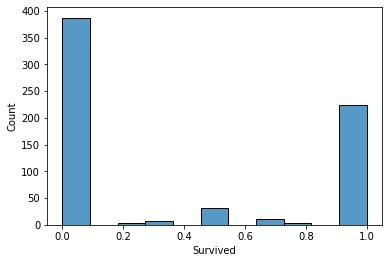

In [8]:
train_data["Surname"] = train_data["Name"].apply(lambda x: x.split(',')[0])
sns.histplot(train_data.groupby('Surname').mean()["Survived"])

<AxesSubplot:xlabel='Survived', ylabel='Count'>

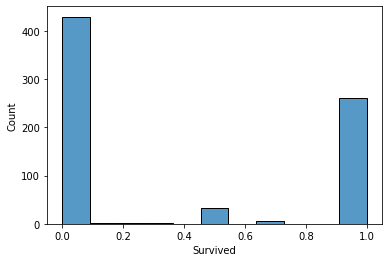

In [9]:
sns.histplot(train_data.groupby(['Surname', 'SibSp', 'Embarked']).mean()["Survived"])

Encoding of categorical variables

In [25]:
train_data_trimmed = train_data[["Survived", "Age", "Sex", "Embarked", "Pclass", "Fare", "Missing Data"]]

In [26]:
embarked = pd.get_dummies(train_data_trimmed.Embarked)
Pclass = pd.get_dummies(train_data_trimmed.Pclass)
sex = pd.get_dummies(train_data_trimmed.Sex)

train_data_trimmed = train_data_trimmed.drop(["Sex", "Embarked", "Pclass"], axis=1)

In [27]:
df_final = pd.concat([train_data_trimmed, Pclass, embarked, sex], axis=1)

In [28]:
from sklearn.model_selection import train_test_split

train_set, validation_set = train_test_split(df_final, test_size=0.2)

In [29]:
output_path1 = parent_path + "train_set.csv"
train_set.to_csv(output_path1, index_label=False)

output_path2 = parent_path + "validation_set.csv"
validation_set.to_csv(output_path2, index_label=False)

: 